In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Row=data_dev[0]
Col=data_dev[1:n]
Col = Col / 255.

data_train=data[1000:m].T
Row_train=data_train[0]
Col_train=data_train[1:n]
Col_train=Col_train/255
_,m_train = Col_train.shape

In [5]:
def init_params():
    W1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

def forward_prop(W1,b1,W2,b2,x):
    Z1=W1.dot(x)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(A1)
    return Z1,A1,Z2,A2


def derive_ReLU(Z):
    return Z>0

def one_hot(y):
    one_hot_Y = np.zeros((y.size, y.max() + 1))
    one_hot_Y[np.arange(y.size), y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_propagation(Z1, A1, Z2, A2, W1, W2, x, y):
    one_hot_Y = one_hot(y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derive_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(x.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*W1
    b1=b1-alpha*db1
    W2=W2-alpha*W2
    b2=b2-alpha*db2
    return W1,b1,W2,b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, y):
    print(predictions,y)
    return np.sum(predictions==y)/y.size

def gradient_descent(x, y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, x)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, x, y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, y))
    return W1, b1, W2, b2

In [7]:
W1,b1,W2,b2=gradient_descent(Col_train,Row_train,0.10, 500)

Iteration:  0
[0 8 4 ... 2 0 4] [5 3 2 ... 9 5 2]
0.15765853658536585
Iteration:  10
[0 4 4 ... 2 0 4] [5 3 2 ... 9 5 2]
0.1553170731707317
Iteration:  20
[4 4 4 ... 2 0 4] [5 3 2 ... 9 5 2]
0.14292682926829267
Iteration:  30
[9 9 4 ... 2 9 9] [5 3 2 ... 9 5 2]
0.09865853658536586
Iteration:  40
[9 9 9 ... 9 9 9] [5 3 2 ... 9 5 2]
0.09987804878048781
Iteration:  50
[9 9 9 ... 9 9 9] [5 3 2 ... 9 5 2]
0.09958536585365854
Iteration:  60
[9 9 9 ... 9 9 9] [5 3 2 ... 9 5 2]
0.09958536585365854
Iteration:  70
[9 9 9 ... 9 9 9] [5 3 2 ... 9 5 2]
0.09958536585365854
Iteration:  80
[9 9 9 ... 9 9 9] [5 3 2 ... 9 5 2]
0.09958536585365854
Iteration:  90
[9 9 9 ... 9 9 9] [5 3 2 ... 9 5 2]
0.09958536585365854
Iteration:  100
[9 9 9 ... 9 9 9] [5 3 2 ... 9 5 2]
0.09958536585365854
Iteration:  110
[9 9 9 ... 9 9 9] [5 3 2 ... 9 5 2]
0.09958536585365854
Iteration:  120
[9 9 9 ... 9 9 9] [5 3 2 ... 9 5 2]
0.09958536585365854
Iteration:  130
[9 9 9 ... 9 9 9] [5 3 2 ... 9 5 2]
0.09958536585365854
Iter

In [8]:
def make_predictions(x, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, x)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = Col_train[:, index, None]
    prediction = make_predictions(Col_train[:, index, None], W1, b1, W2, b2)
    label = Row_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  5


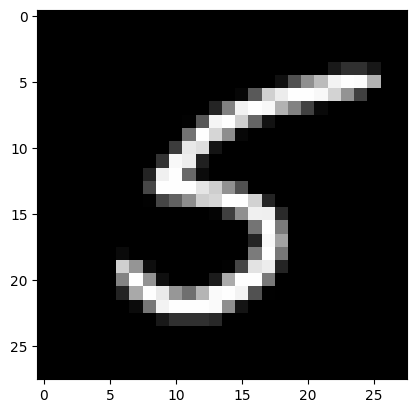

Prediction:  [9]
Label:  3


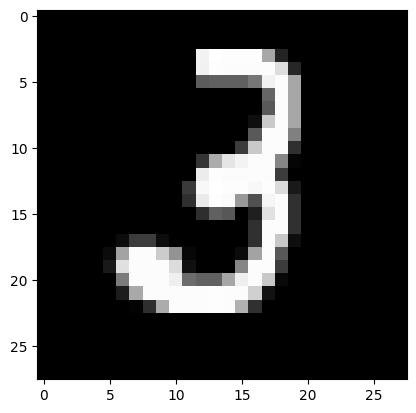

Prediction:  [9]
Label:  2


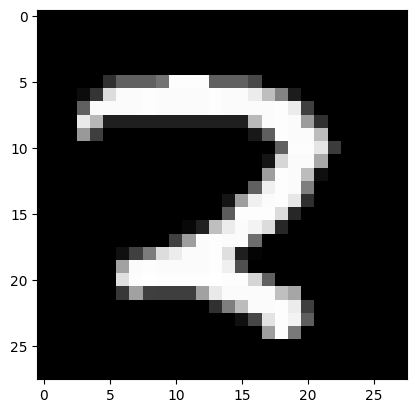

Prediction:  [9]
Label:  5


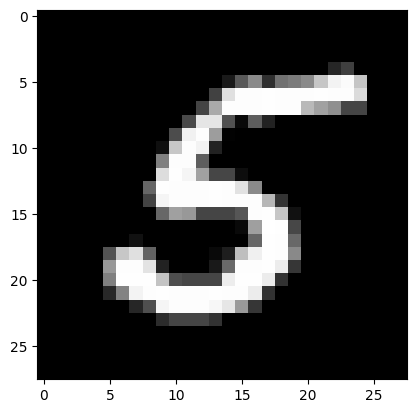

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)